<a href="https://colab.research.google.com/github/1kruidenp/PRA3024/blob/master/ML_MNIST_NN_exercise_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Training data shape:  (60000, 784)
Test data shape (10000, 784)
First 10 training labels as digits:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]



TypeError: ignored

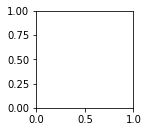

In [33]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ##
#from https://elitedatascience.com/keras-tutorial-deep-learning-in-python
#and https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 2
j=0
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[j])
    j=j+1
plt.show()
### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
### END STUDENT CODE ###

In [31]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [32]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output.
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

ValueError: ignored

In [0]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
### --> Call model.compile with the right arguments.
### END STUDENT CODE ###

In [0]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

### STUDENT CODE HERE ###
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
### END STUDENT CODE ###


In [0]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 32
EPOCHS = 1

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

In [0]:
# Plot the progression of the training process

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [0]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images

from sklearn.metrics import confusion_matrix

### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
### END STUDENT CODE ###

In [0]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
### END STUDENT CODE ###